In [1]:
from complex_mode_overlap import *
import numpy as np

# loading, reshaping, clipping COMSOL .dat

In [2]:
dat_fiber, param_fiber = loadData('../normE_fiber2.dat')
dat, param_list = loadData('../normE_all14.dat')

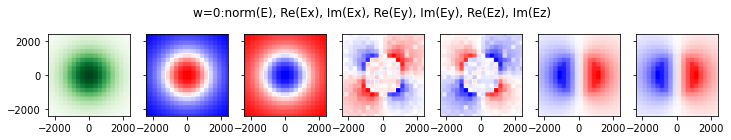

In [ ]:
plotComplexData(dat_fiber, range(4), bound=2500)

d:\personal_folders\po\COMSOL_po\210804\mode_overlap\complex_mode_overlap.py:148: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(12,2))


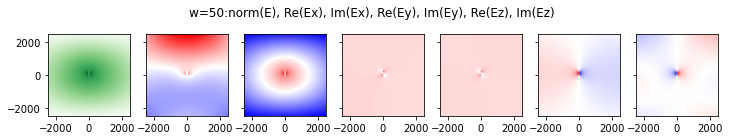

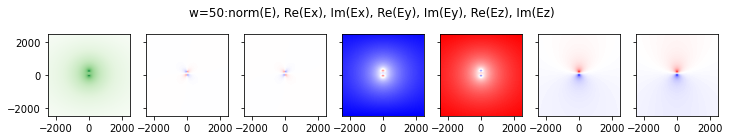

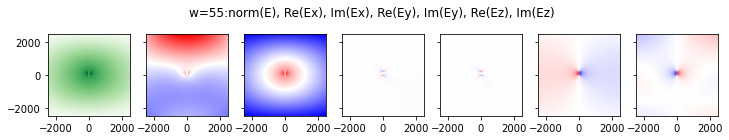

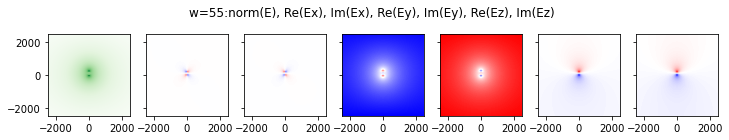

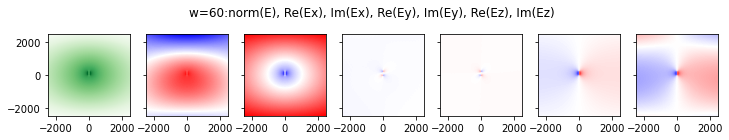

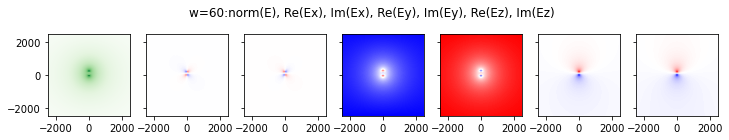

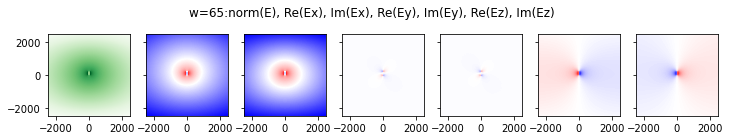

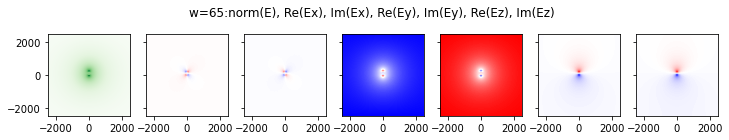

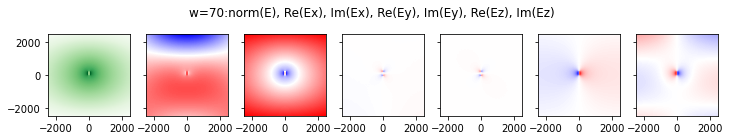

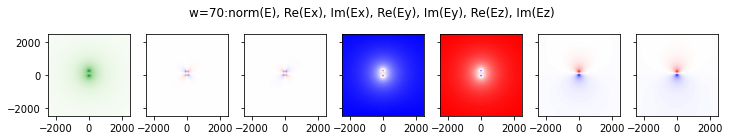

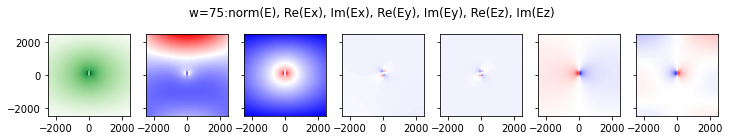

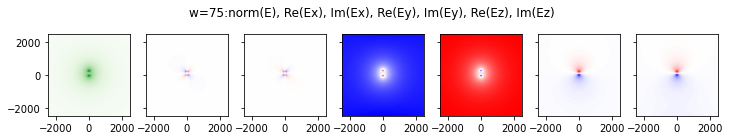

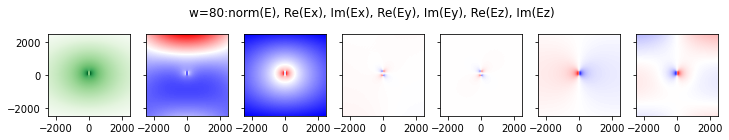

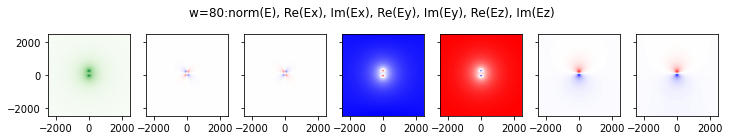

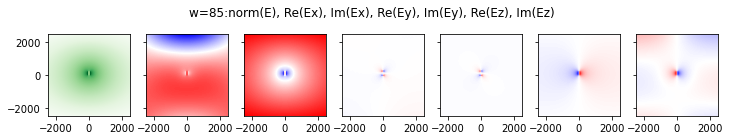

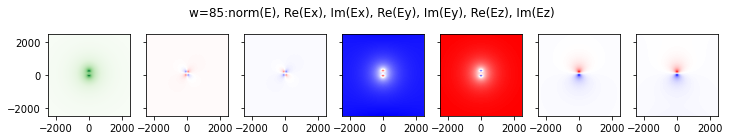

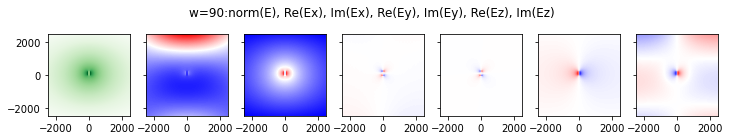

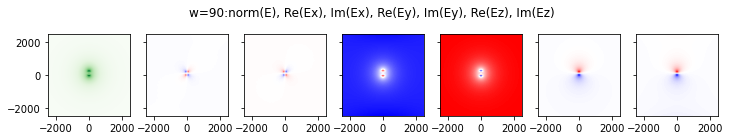

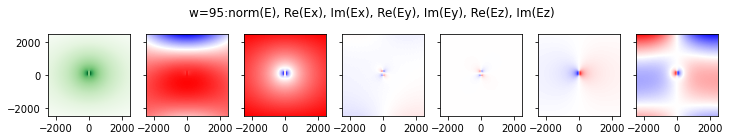

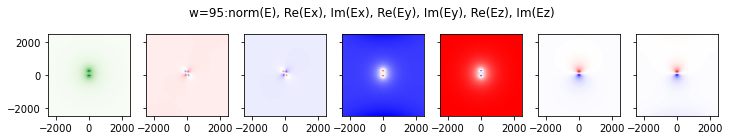

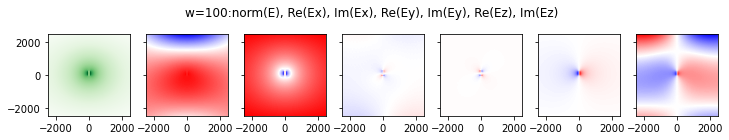

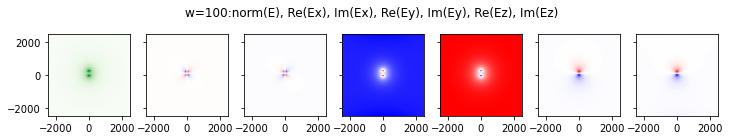

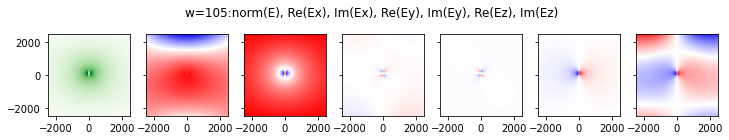

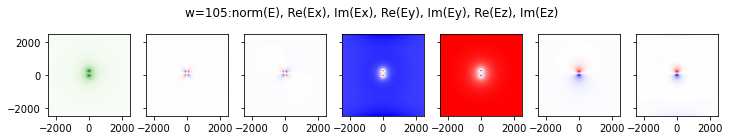

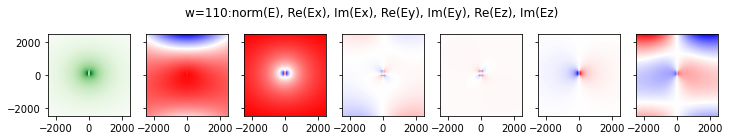

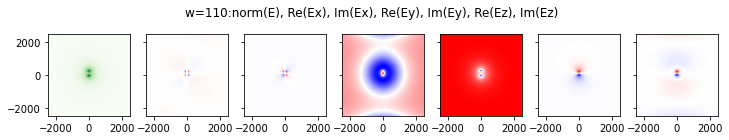

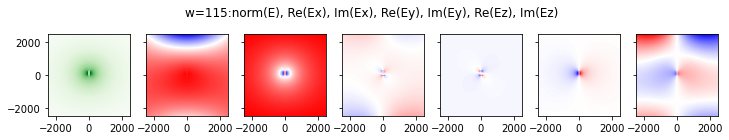

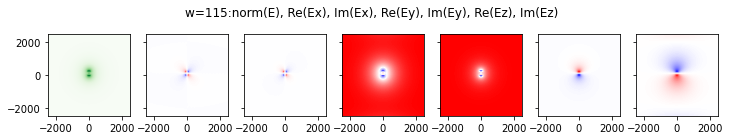

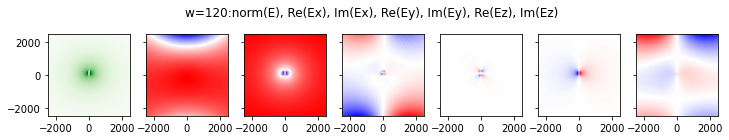

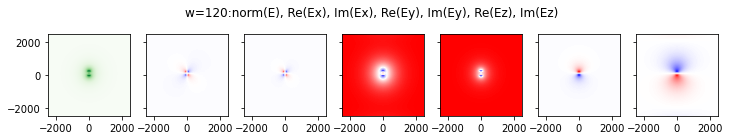

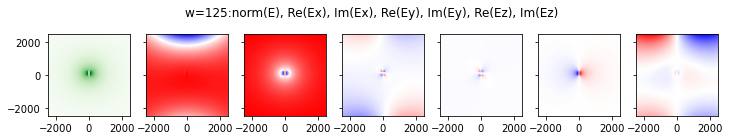

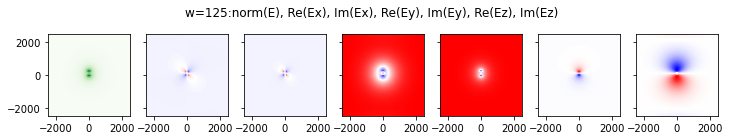

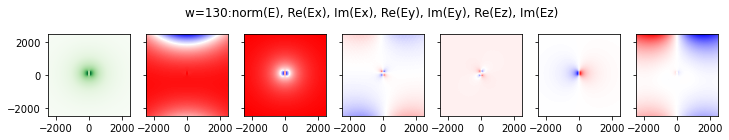

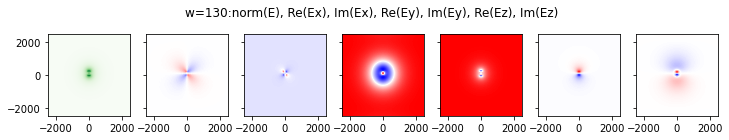

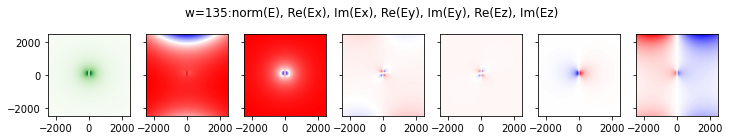

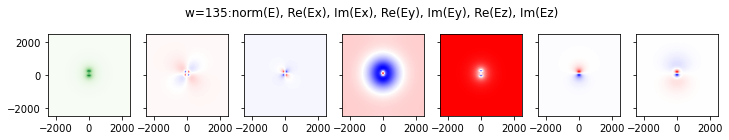

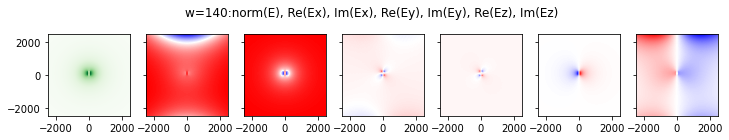

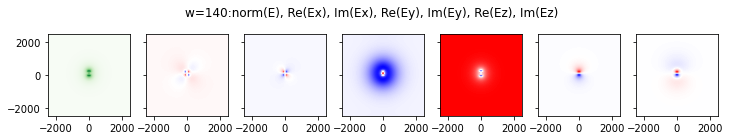

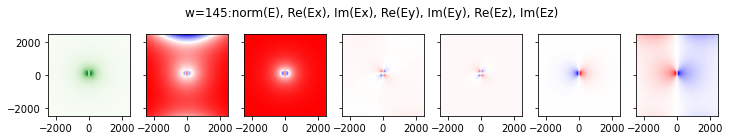

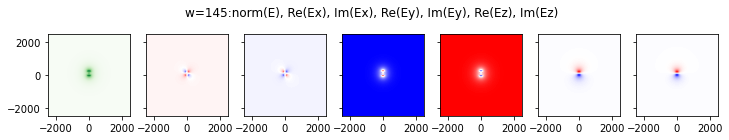

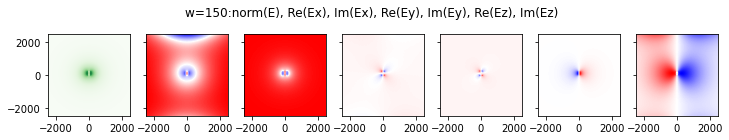

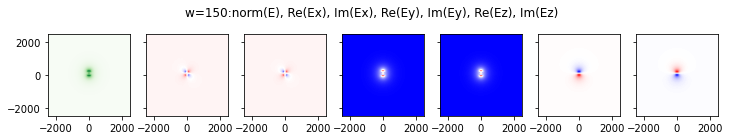

In [ ]:
#plotComplexData(dat, param_list, bound=2500)

In [ ]:
convolveComplex(dat_fiber, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = True,
                 plotflag2=True, fitflag= True,
                 i=0)

ValueError: cannot reshape array of size 42000000 into shape (250000,21,4)